In [6]:
# Import libraries
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For creating statistical visualizations
from scipy.stats import spearmanr # For calculating Spearman's rank correlation coefficient
from dateutil import parser # For parsing dates

In [7]:
# --- Step 1: Load and Prepare Data ---
# Load daily activity data
daily = pd.read_csv('dailyActivity_merged.csv')
daily['Date'] = daily['Date'].apply(lambda x: parser.parse(str(x), dayfirst=False))

In [8]:
# Load sleep data
Sleep_df = pd.read_csv('sleepDay_merged.csv')
Sleep_df['SleepDay'] = Sleep_df['SleepDay'].apply(lambda x: parser.parse(str(x), dayfirst=False))

In [9]:
# Merge daily and sleep data
merged_df = pd.merge(daily, Sleep_df, how="inner", left_on=["Id", "Date"], right_on=["Id", "SleepDay"])
merged_df = merged_df.drop(columns=['SleepDay'])

In [10]:
# Verify data
print("Merged Dataset Info:")
merged_df.info()

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   Date                      413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   VeryActiveDistance        413 non-null    float64       
 5   ModeratelyActiveDistance  413 non-null    float64       
 6   LightActiveDistance       413 non-null    float64       
 7   VeryActiveMinutes         413 non-null    int64         
 8   FairlyActiveMinutes       413 non-null    int64         
 9   LightlyActiveMinutes      413 non-null    int64         
 10  SedentaryMinutes          413 non-null    int64         
 11  Calories                  413 non-null    int64         
 12  T

In [11]:
# --- Step 2: Clean Data and Handle Zero Values ---
# Check for duplicates and remove
print("\nDuplicates:", merged_df.duplicated().sum())
merged_df.drop_duplicates(inplace=True)

# Quantify zero values in VeryActiveMinutes
zero_count = (merged_df['VeryActiveMinutes'] == 0).sum()
total_count = len(merged_df)
zero_percentage = (zero_count / total_count) * 100
print(f"Zero values in VeryActiveMinutes: {zero_count}/{total_count} ({zero_percentage:.2f}%)")

# Categorize VeryActiveMinutes to handle zeros
merged_df['VeryActiveCategory'] = pd.cut(merged_df['VeryActiveMinutes'], 
                                         bins=[-1, 0, 10, 30, float('inf')], 
                                         labels=['None', 'Low', 'Moderate', 'High'])


Duplicates: 3
Zero values in VeryActiveMinutes: 147/410 (35.85%)


In [12]:
# --- Step 3: Add Derived Features ---
# Calculate SleepEfficiency (handle division by zero)
merged_df['SleepEfficiency'] = merged_df['TotalMinutesAsleep'] / merged_df['TotalTimeInBed'].replace(0, 1) * 100

# Categorize ActivityLevel based on TotalSteps
merged_df['ActivityLevel'] = pd.cut(merged_df['TotalSteps'], 
                                    bins=[0, 5000, 10000, float('inf')], 
                                    labels=['Sedentary', 'Active', 'Very Active'])

# Extract DayOfWeek
merged_df['DayOfWeek'] = merged_df['Date'].dt.day_name()


In [13]:
# --- Step 4: Verify Data Integrity ---
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
VeryActiveCategory          0
SleepEfficiency             0
ActivityLevel               0
DayOfWeek                   0
dtype: int64


In [14]:
merged_df.drop(columns=['TotalMinutesAsleep', 'TotalTimeInBed', 'VeryActiveCategory','TotalSleepRecords'], inplace=True)

In [15]:
merged_df.isnull().sum()

Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
SleepEfficiency             0
ActivityLevel               0
DayOfWeek                   0
dtype: int64

In [16]:
merged_df.head()

,Id,Date,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepEfficiency,ActivityLevel,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,94.508671,Very Active,Tuesday
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,94.348894,Very Active,Wednesday
2,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,93.212670,Active,Friday
3,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,92.643052,Very Active,Saturday
4,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,98.314607,Active,Sunday


In [17]:
corr, p_value = spearmanr(merged_df['TotalSteps'], merged_df['Calories'])
print(f"Spearman Correlation between TotalSteps and Calories: {corr:.3f}, p-value: {p_value:.3e}")

Spearman Correlation between TotalSteps and Calories: 0.333, p-value: 4.573e-12


In [18]:
sns.set_theme(style="whitegrid")

## Distribution of Activity Levels

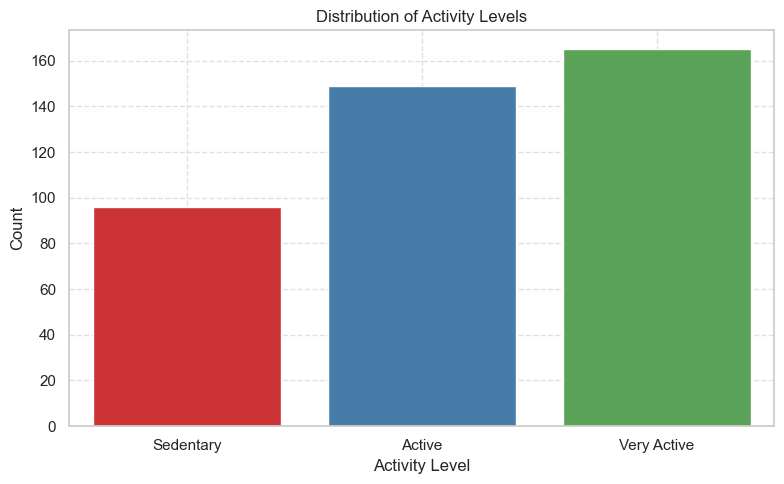

In [19]:
# --- Distribution of Activity Levels ---
plt.figure(figsize=(8, 5))
sns.countplot(x='ActivityLevel', data=merged_df, hue='ActivityLevel', palette='Set1', legend=False)
plt.title('Distribution of Activity Levels')
plt.xlabel('Activity Level')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('activity_level_distribution.png')
plt.show()

This chart shows that most individuals fall into the 'Very Active' category, while the fewest are 'Sedentary', indicating a generally active population.

## Average Total Steps by Day of the Week

C:\Users\deepa\AppData\Local\Temp\ipykernel_9764\2524167874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='TotalSteps', data=merged_df, palette='Set2',


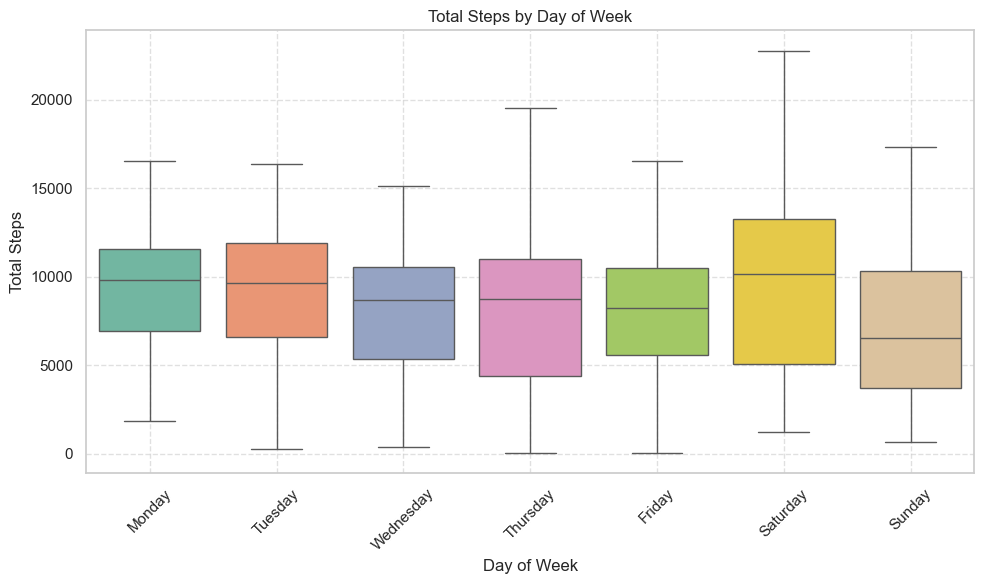

In [20]:
# --- Step 7: Visualize Total Steps by Day of Week ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='TotalSteps', data=merged_df, palette='Set2', 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('steps_by_day.png')
plt.show()

This chart shows that step counts tend to peak on Saturdays, with more variability, while Sundays have the lowest median steps, indicating reduced activity on weekends.

## Calories Burned by Day of the Week

C:\Users\deepa\AppData\Local\Temp\ipykernel_9764\3188936589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calories_by_day.index, y=calories_by_day.values, palette='Reds')


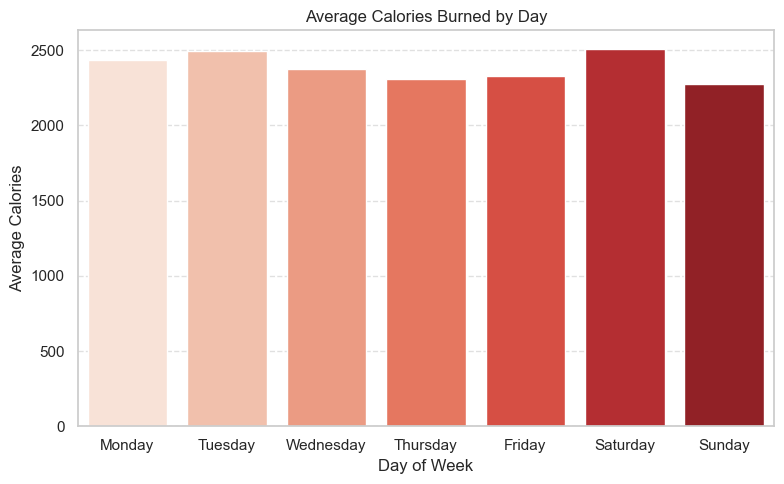

In [21]:
calories_by_day = merged_df.groupby('DayOfWeek')['Calories'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 5))
sns.barplot(x=calories_by_day.index, y=calories_by_day.values, palette='Reds')
plt.title('Average Calories Burned by Day')
plt.ylabel('Average Calories')
plt.xlabel('Day of Week')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This chart shows that average calories burned peak on Saturday, while Sunday has the lowest burn, suggesting higher physical activity during weekends.

## Sleep Efficiency Distribution

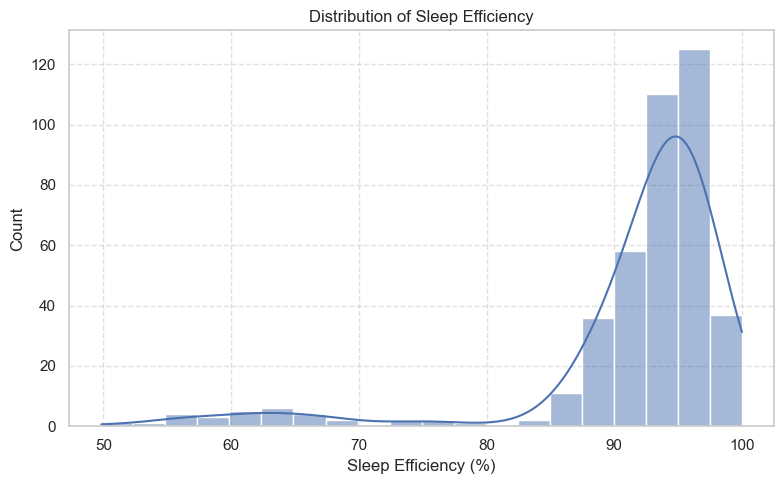


Sleep Efficiency Summary:
count    410.000000
mean      91.646671
std        8.728386
min       49.836066
25%       91.181156
50%       94.263857
75%       96.064164
max      100.000000
Name: SleepEfficiency, dtype: float64


In [22]:
# ---Visualize Sleep Efficiency Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['SleepEfficiency'], bins=20, kde=True)
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Sleep Efficiency (%)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('sleep_efficiency_distribution.png')
plt.show()

# Summary statistics
print("\nSleep Efficiency Summary:")
print(merged_df['SleepEfficiency'].describe())

This chart shows that most users have high sleep efficiency, with the majority clustered between 90% and 100%.
Most users maintain high sleep efficiency, with a median of 94.26% and over 75% achieving above 91% efficiency.

## Active Minutes Comparison

C:\Users\deepa\AppData\Local\Temp\ipykernel_9764\3698110323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_minutes.index, y=activity_minutes.values, palette='coolwarm')


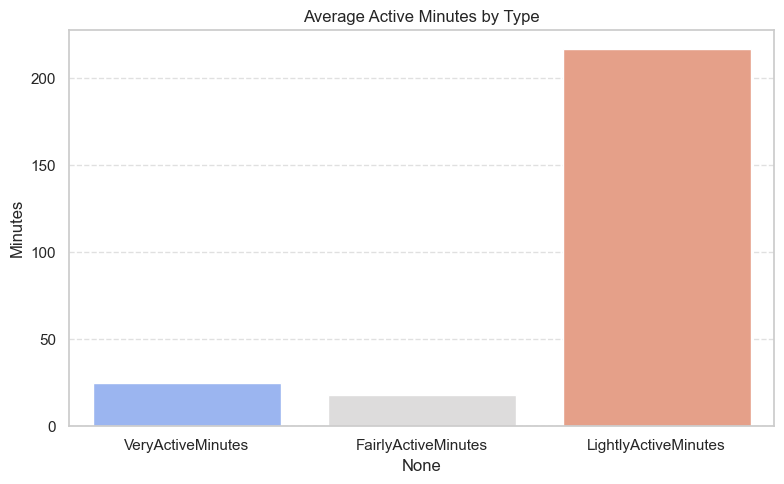

In [23]:
activity_minutes = merged_df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=activity_minutes.index, y=activity_minutes.values, palette='coolwarm')
plt.title('Average Active Minutes by Type')
plt.ylabel('Minutes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Users spend most of their time in light activity, averaging over 210 minutes, while very and fairly active minutes remain significantly lower.

## Relationship Between Steps and Calories

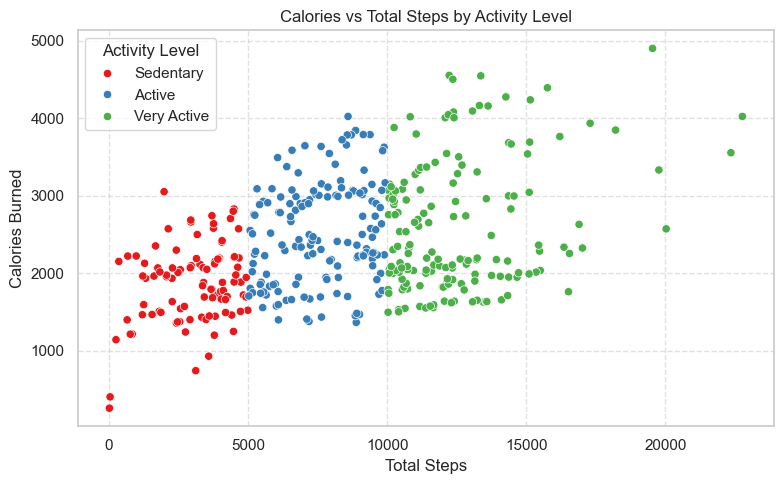

In [24]:
# --- Step 5: Visualize Calories vs Total Steps by Activity Level ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='TotalSteps', y='Calories', hue='ActivityLevel', palette='Set1')
plt.title('Calories vs Total Steps by Activity Level')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.legend(title='Activity Level')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('calories_vs_steps.png')  # Save plot for reporting
plt.show()

As total steps increase, calories burned also rise, with very active individuals showing the highest values, confirming a strong link between activity level and energy expenditure.

### 🔍 **Key Insights**

* **Light Activity Dominates**: Most users engage in light daily activity, as evidenced by the high prevalence of Sedentary and Active categories in the activity level distribution (see countplot).
* **Steps Drive Calorie Burn**: Increased steps correlate with higher calorie expenditure (Spearman correlation: 0.333, p-value: 4.573e-12), as shown in the scatter plot.
* **High Sleep Efficiency**: Users maintain good sleep quality, with sleep efficiency typically between 90–100% (see histogram and summary statistics).
* **Weekend Engagement**: Activity levels peak on weekends, particularly Saturdays, as shown by higher step counts in the day-of-week analysis (see box plot).

---

### 📈 **Strategic Recommendations**

1. **Promote Balanced Wellness**: Market Bellabeat as a **holistic wellness companion** for light activity, hydration, and mindfulness, aligning with user preferences for moderate routines.
2. **Enhance Sleep Features**: Develop and promote **advanced sleep tracking** (e.g., duration, quality metrics) to capitalize on users’ high sleep efficiency.
3. **Weekend-Based Campaigns**: Launch **weekend wellness challenges** to boost engagement during peak activity days like Saturday.
4. **Lifestyle Integration Messaging**: Position Bellabeat as a tool for **simple, sustainable habits**, emphasizing seamless integration into daily life.

---

### 🚀 **Actionable Next Steps**

* **Product Development**: Prioritize features for **light activity tracking** (e.g., step goals, reminders) and **sleep analysis** (e.g., duration, patterns).
* **Engagement Features**: Implement **daily prompts**, progress tracking, and weekend challenges to encourage consistent use.
* **User Research**: Collect feedback on desired features like **stress monitoring**, **heart rate tracking**, or **personalized wellness insights**.

In [25]:
# --- Step 10: Save Updated Dataset ---
merged_df.to_csv("Clean_FitBit_Fitness_Tracker_Data_Updated.csv", index=False)
print("Dataset saved as 'Clean_FitBit_Fitness_Tracker_Data_Updated.csv'")

Dataset saved as 'Clean_FitBit_Fitness_Tracker_Data_Updated.csv'
